# The purpose of this project is to determine the quality of wine which is provided as label based on the various chemicals present in them as features

## tool used for data preprocessing: pandas

## tool used for visualization : matplotlib

## model used for prediction: KNN Classifer with random and grid search and also used different parameters to measure the distance between nodes, the number of neighbours to be selected

## tools used for data validation: Repeated K Fold cross validation

In [6]:
from google.colab import drive

In [7]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
%cd /content/drive/'My Drive'/'Colab Notebooks'
%ls

/content/drive/My Drive/Colab Notebooks
 abalone.data                homework01.ipynb           'Practise 2.ipynb'
 bpRNA_CRW_2852.ct           homework02.ipynb            Protein_Project.ipynb
 bpRNA_CRW_2852.st           homework03.ipynb            SPECT.test
 breast-cancer.data          homework05.ipynb            SPECT.train
 car.data                    iris_tree.dot               transfusion.data
 car.dot                     iris_tree.png               tree.dot
 car_model.dot              'ML Challenge 1.ipynb'       tree.png
 car.png                    'ML Challenge II .ipynb'     weather.csv
'Copy of homework05.ipynb'   Perceptron_practise.ipynb   weather.ipynb
 ecoli.data                 'Practise 1.ipynb'           wine.data


In [9]:
import pandas as pd
import numpy as np

In [12]:
import pandas as pd
wine_data = pd.read_csv('wine.data', header=None)
wine_data.columns = ['Label']+[ 'F'+str(i) for i in range(1,14)]
wine_data

,Label,F1,F2,F3,F4,F5,F6,F7,F8,F9,F10,F11,F12,F13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [14]:
features = wine_data.drop(['Label'],axis=1)

In [17]:
label = wine_data['Label']

In [13]:
from sklearn.model_selection import train_test_split

In [18]:
wine_train, wine_test, y_train, y_test = train_test_split(features, label, test_size=0.3, random_state=42)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.neighbors import KNeighborsClassifier
import scipy.spatial.distance as distance
import numpy as np
def chi_square_distance(X, Y):
    with np.errstate(divide="ignore", invalid="ignore"):
        return (1 / 2) * np.sum(np.nan_to_num((np.square(X - Y) / (X + Y))))

n_neighbors = [int(x) for x in np.linspace(1, 15, num = 15)]
metric = [chi_square_distance, distance.euclidean, distance.minkowski, distance.cosine]
param_distribs = {'n_neighbors':n_neighbors,'metric': metric}
estimator = KNeighborsClassifier()

## we are using repeated cross-validation here. This means the cross-validation will be repeatedly run multiple times to get more robust error estimation. The key changes are highlighted
from sklearn.model_selection import RepeatedKFold
skfold = RepeatedKFold(n_splits=10,n_repeats=10,random_state=1)

In [24]:
wine_grid_search = RandomizedSearchCV(estimator, param_distribs, n_jobs=5,cv=skfold)
wine_grid_search.fit(wine_train,y_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=5,
                   param_distributions={'metric': [<function chi_square_distance at 0x7fc679409b70>,
                                                   <function euclidean at 0x7fc68a5da620>,
                                                   <function minkowski at 0x7fc68a5da510>,
                                                   <function cosine at 0x7fc68a5da7b8>],
                             

In [25]:
wine_best_model = wine_grid_search.best_estimator_ 

In [26]:
wine_best_model

KNeighborsClassifier(algorithm='auto', leaf_size=30,
                     metric=<function chi_square_distance at 0x7fc679409b70>,
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [27]:
from sklearn.model_selection import cross_val_score

In [28]:
print('Cross-validation Accuracy on wine train data set: ',cross_val_score(wine_best_model,wine_train,y_train,cv=10).mean())

Cross-validation Accuracy on wine train data set:  0.8865384615384617


In [29]:
from sklearn.metrics import accuracy_score

In [30]:
print('Accuracy on wine test dataset: ',accuracy_score(wine_best_model.predict(wine_test), y_test))

Accuracy on wine test dataset:  0.9629629629629629


In [103]:
cross_val_original_data = cross_val_score(wine_best_model,wine_train,y_train,cv=10)

In [104]:
cross_val_original_data

array([0.76923077, 0.92307692, 0.92307692, 1.        , 0.83333333,
       0.75      , 0.83333333, 1.        , 0.91666667, 0.91666667])

In [41]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
wine_data_train_scaled= scaler.fit_transform(wine_train)





In [43]:
wine_data_test_scaled = scaler.fit_transform(wine_test)

In [45]:
wine_random_search_scaled = RandomizedSearchCV(estimator, param_distribs, n_jobs=5,cv=skfold)
wine_random_search_scaled.fit(wine_data_train_scaled,y_train)

RandomizedSearchCV(cv=RepeatedKFold(n_repeats=10, n_splits=10, random_state=1),
                   error_score=nan,
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='deprecated', n_iter=10, n_jobs=5,
                   param_distributions={'metric': [<function chi_square_distance at 0x7fc679409b70>,
                                                   <function euclidean at 0x7fc68a5da620>,
                                                   <function minkowski at 0x7fc68a5da510>,
                                                   <function cosine at 0x7fc68a5da7b8>],
                             

In [46]:
wine_scaled_best_model = wine_random_search_scaled.best_estimator_ 

In [90]:
cross_val_scaled_data = cross_val_score(wine_scaled_best_model,wine_data_train_scaled,y_train,cv=10)

In [91]:
cross_val_scaled_data

array([1.        , 0.92307692, 0.92307692, 1.        , 0.91666667,
       1.        , 0.91666667, 1.        , 1.        , 0.91666667])

In [87]:
print('Cross-validation Accuracy on scaled wine train data set: ',cross_val_score(wine_scaled_best_model,wine_data_train_scaled,y_train,cv=10).mean())

Cross-validation Accuracy on scaled wine train data set:  0.9596153846153845


In [54]:
accuracy_score_scaled = accuracy_score(wine_scaled_best_model.predict(wine_data_test_scaled), y_test)

In [49]:
print('Accuracy on wine  scaled test dataset: ',accuracy_score(wine_scaled_best_model.predict(wine_data_test_scaled), y_test))

Accuracy on wine  scaled test dataset:  0.9444444444444444


In [100]:
total_k = [1,2,3,4,5,6,7,8,9,10]


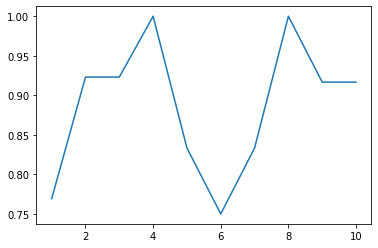

In [105]:
plt.plot(total_k,cross_val_original_data)

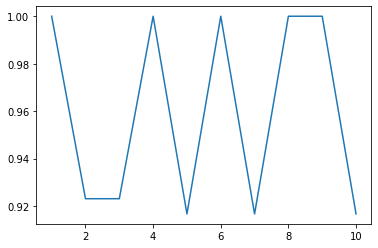

In [101]:
plt.plot(total_k,cross_val_scaled_data)

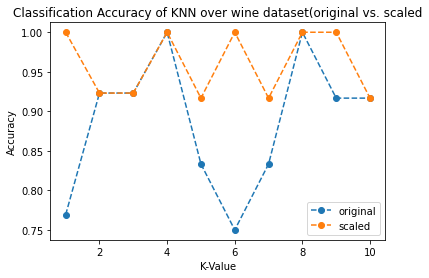

In [107]:
plt.plot(total_k, cross_val_original_data, label='original', linestyle='--',marker='o')
plt.plot(total_k, cross_val_scaled_data, label='scaled', linestyle='--',marker='o')
plt.xlabel('K-Value')
plt.ylabel('Accuracy')
plt.title('Classification Accuracy of KNN over wine dataset(original vs. scaled')
plt.legend(loc='lower right')